# Quantum Teleportation: Concept, Mathematics, and Implementation

## Introduction

Quantum teleportation is a fundamental protocol in quantum information science that enables the transfer of quantum information from one location to another. Despite its name, it doesn't involve the transportation of matter, but rather the transmission of the quantum state of a particle.

## The Concept

In quantum teleportation, we have three main parties:

1. Alice: The sender who wants to transmit a quantum state.
2. Bob: The receiver who will receive the quantum state.
3. A quantum channel: Usually an entangled pair of qubits shared between Alice and Bob.

The goal is for Alice to transmit the state of her qubit to Bob using only classical communication and their shared entanglement.

## Mathematical Formulation

Let's walk through the mathematical formulation of quantum teleportation:

1. Initial state:
   Alice has a qubit in an unknown state |ψ⟩ = α|0⟩ + β|1⟩, where |α|² + |β|² = 1.
   Alice and Bob share an entangled pair in the Bell state |Φ⁺⟩ = (1/√2)(|00⟩ + |11⟩).

2. The initial state of the entire system:
   |Ψ₀⟩ = |ψ⟩ ⊗ |Φ⁺⟩ = (1/√2)(α|0⟩ + β|1⟩) ⊗ (|00⟩ + |11⟩)

3. Expanding the state:
   |Ψ₀⟩ = (1/√2)[α|000⟩ + α|011⟩ + β|100⟩ + β|111⟩]

4. Alice applies a CNOT gate to her qubits:
   |Ψ₁⟩ = (1/√2)[α|000⟩ + α|011⟩ + β|110⟩ + β|101⟩]

5. Alice applies a Hadamard gate to her first qubit:
   |Ψ₂⟩ = (1/2)[α(|000⟩ + |100⟩) + α(|011⟩ + |111⟩) + β(|010⟩ - |110⟩) + β(|001⟩ - |101⟩)]

6. Rearranging terms:
   |Ψ₂⟩ = (1/2)[|00⟩(α|0⟩ + β|1⟩) + |01⟩(α|1⟩ + β|0⟩) + |10⟩(α|0⟩ - β|1⟩) + |11⟩(α|1⟩ - β|0⟩)]

7. Alice measures her qubits, collapsing the state. There are four possible outcomes:
   - 00: Bob's qubit is in state α|0⟩ + β|1⟩
   - 01: Bob's qubit is in state α|1⟩ + β|0⟩
   - 10: Bob's qubit is in state α|0⟩ - β|1⟩
   - 11: Bob's qubit is in state α|1⟩ - β|0⟩

8. Based on Alice's measurement, Bob applies the appropriate correction:
   - 00: I (identity, do nothing)
   - 01: X (bit flip)
   - 10: Z (phase flip)
   - 11: ZX (bit and phase flip)

After Bob's correction, his qubit is in the state α|0⟩ + β|1⟩, which is the original state of Alice's qubit.

## The Protocol: Step-by-Step

1. Preparation:
   - Alice has a qubit in state |ψ⟩ = α|0⟩ + β|1⟩.
   - Alice and Bob share an entangled pair in the Bell state |Φ⁺⟩ = (1/√2)(|00⟩ + |11⟩).

2. Alice's operations:
   - Alice applies a CNOT gate with her qubit as control and her half of the entangled pair as target.
   - Alice applies a Hadamard gate to her qubit.

3. Measurement:
   - Alice measures both of her qubits in the computational basis.

4. Classical communication:
   - Alice sends the two classical bits resulting from her measurement to Bob.

5. Bob's correction:
   - Based on the classical bits received, Bob applies the appropriate quantum gate(s) to his qubit.

6. Result:
   - Bob's qubit is now in the state α|0⟩ + β|1⟩, the original state of Alice's qubit.

## Implementation in Qiskit

Let's implement the quantum teleportation protocol using Qiskit:

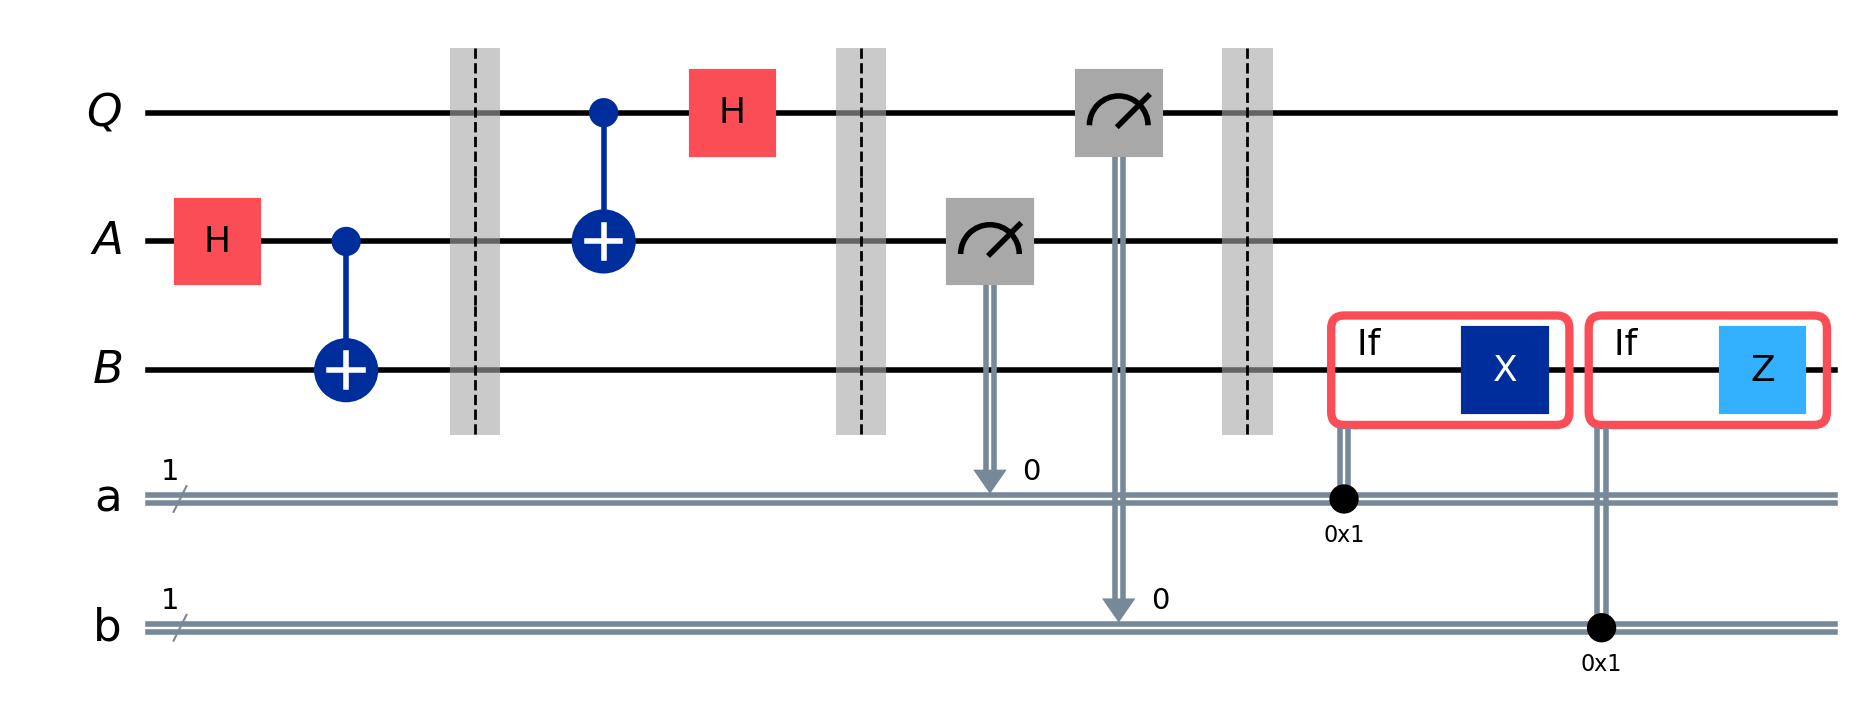

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
import matplotlib.pyplot as plt 
import seaborn as sns

# Create quantum and classical registers
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

# Create quantum circuit
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Initialize Q to |1⟩ state
# protocol.x(qubit)

# Prepare entangled pair (Bell state) for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

# Display the circuit
display(protocol.draw('mpl', scale=2))

In [17]:
# verification_circuit = QuantumCircuit(qubit, ClassicalRegister(1, 'c'))
# # verification_circuit.x(qubit)
# verification_circuit.measure(qubit, 0)

# simulator = AerSimulator()
# result = simulator.run(verification_circuit, shots=1000).result()
# counts = result.get_counts()
# print(counts)


This code creates a quantum circuit that implements the quantum teleportation protocol. Let's break down the steps:

1. We create quantum registers for the qubit to be teleported (Q), Alice's entangled qubit (A), and Bob's entangled qubit (B). We also create classical registers to store measurement results.

2. We prepare the entangled pair shared by Alice and Bob using a Hadamard gate and a CNOT gate.

3. Alice performs her operations: a CNOT gate with Q as control and A as target, followed by a Hadamard gate on Q.

4. Alice measures her qubits and stores the results in classical bits.

5. Based on Alice's measurement results, Bob applies X and/or Z gates to his qubit.

## Verifying the Teleportation

To verify that the teleportation worked, we can prepare the initial qubit in a specific state, run the teleportation protocol, and then measure Bob's qubit to see if it matches the initial state. Here's how we can do that:

### Random Gate
We'll use a randomly generated single-qubit unitary gate (U gate) to create an arbitrary quantum state. Here's how we create this random gate:

**Why Add a Random U Gate?**

The addition of a random U gate serves several important purposes in our verification process:

1. Generality: By using a random state, we're testing the teleportation protocol for a general, arbitrary quantum state, not just specific states like |0⟩, |1⟩, or |+⟩.
2. Robustness: If the protocol works for a randomly chosen state, it's likely to work for all states. This provides a more thorough verification than testing with a few predetermined states.
3. Avoiding Bias: Random testing helps avoid any unintentional bias in our verification process that might arise from choosing specific test states.
4. Simulating Real-World Scenarios: In practical applications, the states we need to teleport are often unknown or arbitrary. Testing with a random state better simulates these real-world scenarios.

In [39]:
from qiskit.circuit.library import UGate, XGate, HGate
from numpy import pi, random

random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

xgate = XGate()
hgate = HGate()

display(random_gate.to_matrix(), xgate.to_matrix())

array([[-0.61747588+0.j        ,  0.28776308+0.7320628j ],
       [-0.78573506-0.03665989j, -0.19886638-0.58457559j]])

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

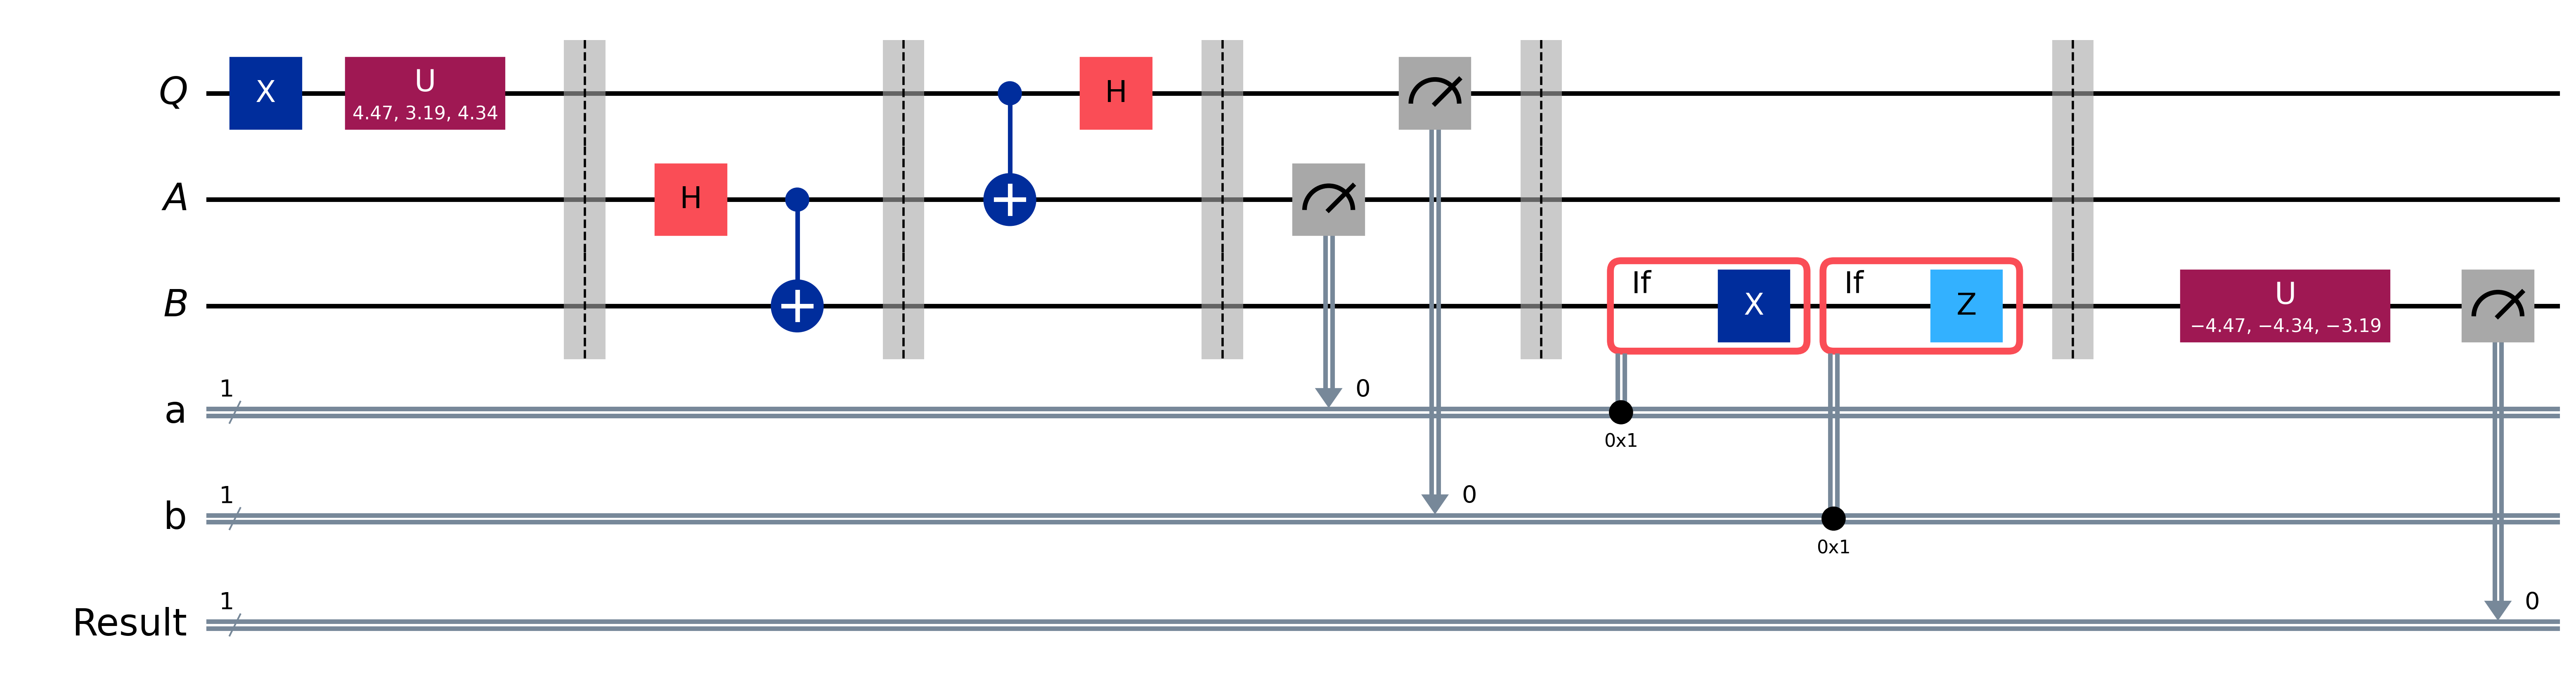

In [62]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
Q_input = [0, 1]

if Q_input == [0, 1]:
    # |1⟩ state, so append X gate before the random gate
    test.append(xgate, qubit)
    # test.barrier()

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.
test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw("mpl", scale=2))

Let's break down this process:

* We apply the random U gate to qubit Q (by default is set to **|0⟩**), creating a random quantum state.
* We then run the teleportation protocol, which should teleport this random state from Q to B.
* After teleportation, we apply the inverse of our random U gate to B.
* Finally, we measure B.

If the teleportation worked correctly, applying the inverse of the random U gate to B should return it to the |0⟩ state (or |1⟩ if X operator is applied), and our measurement should always yield 0.

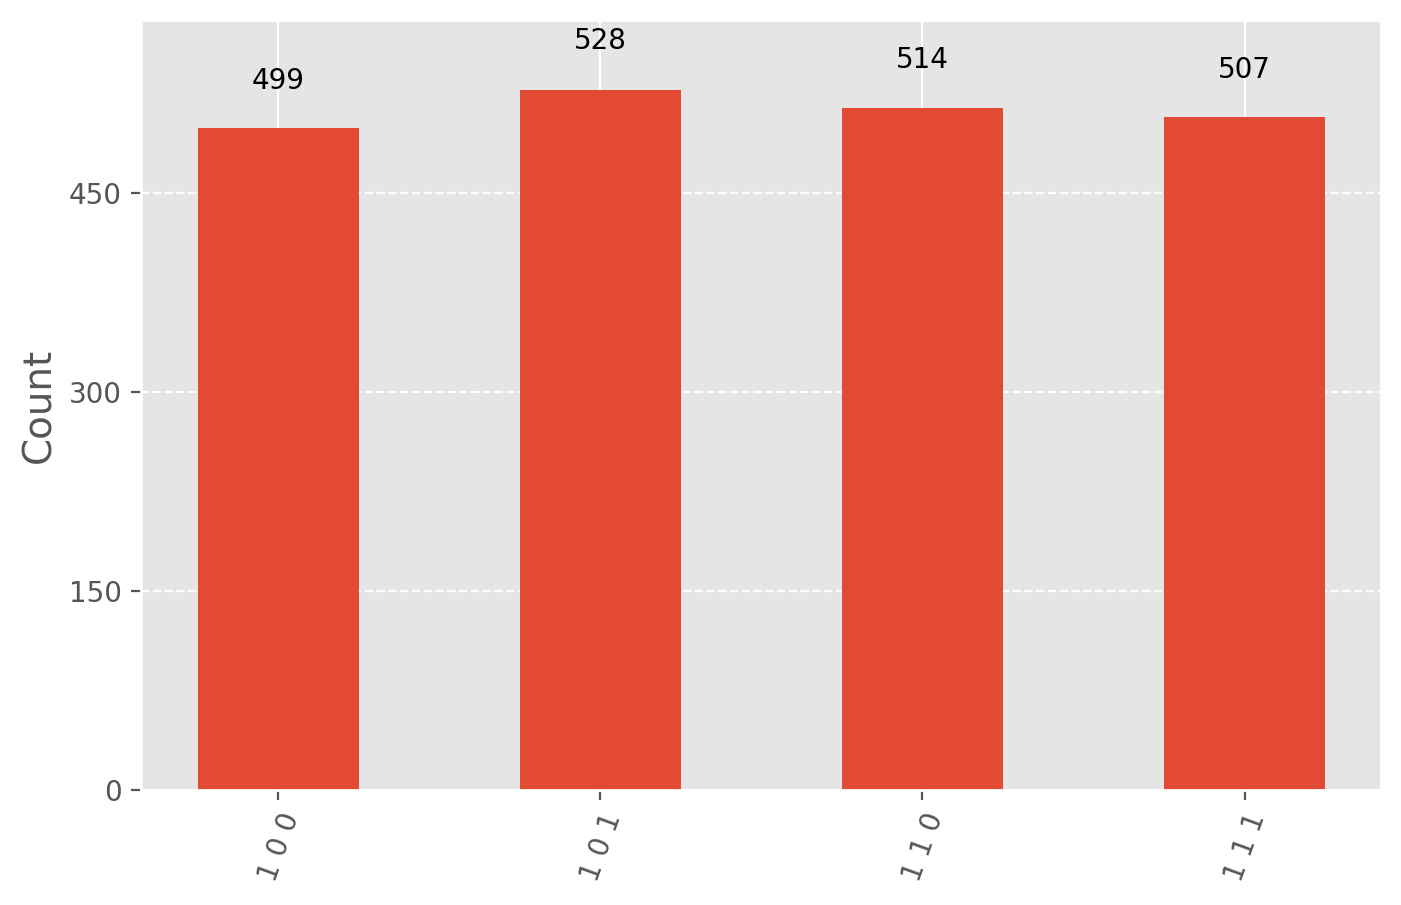

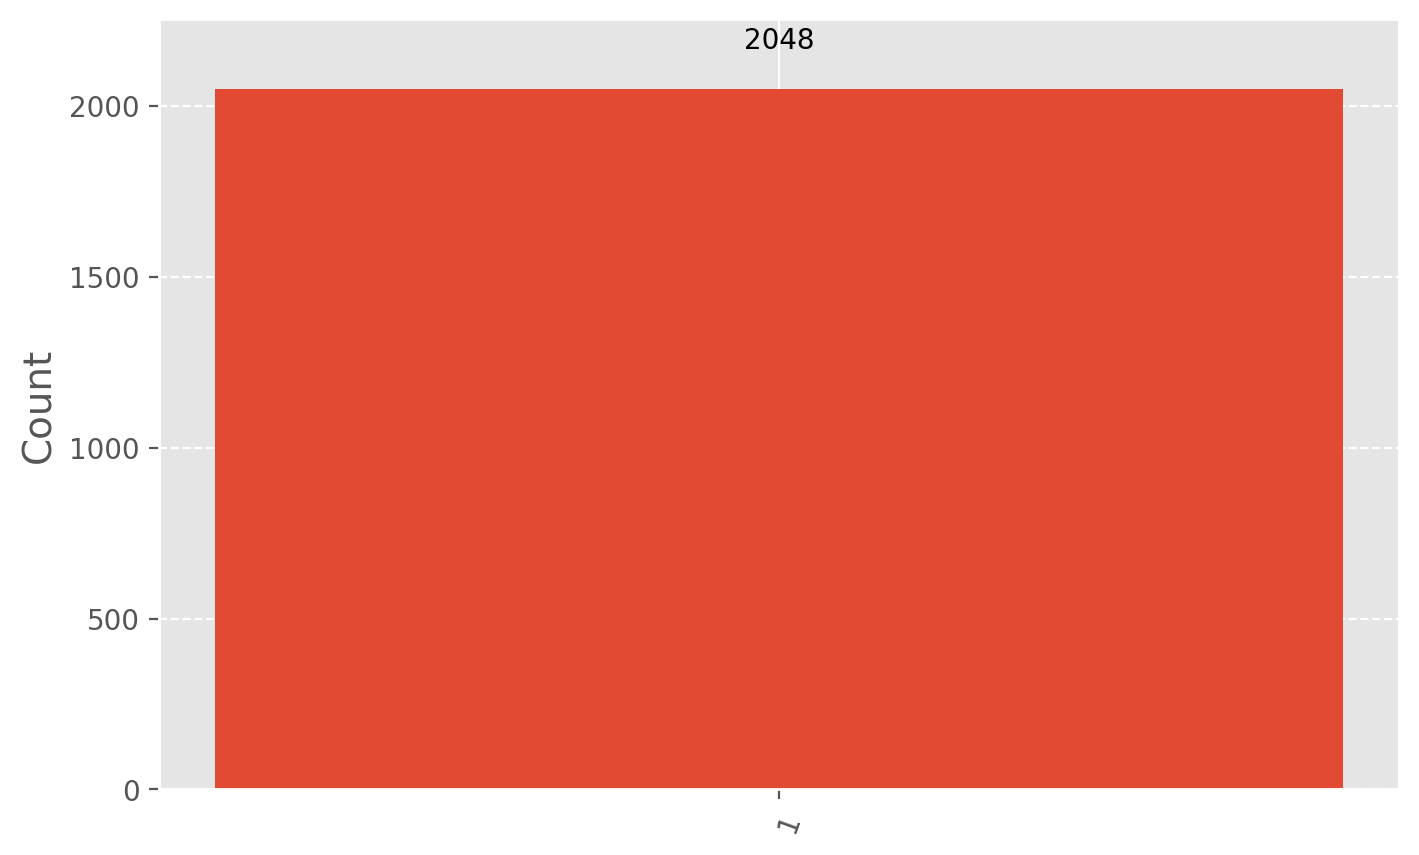

In [63]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution

plt.style.use("ggplot")
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':200})

result = AerSimulator().run(test, shots=2048).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# Filter statistics to focus on the test result qubit
filtered_statistics = marginal_distribution(statistics, [2]) #2 means the leftmost/ bottom qubit (B in this case)
display(plot_histogram(filtered_statistics))


This code creates a function `run_teleportation` that takes an initial state, runs the teleportation protocol, and returns the measurement results. We then test this function with various initial states.

## Mathematical Analysis of the Verification

Let's analyze what happens in each case:

1. |0⟩ state: 
   - Initial state: |ψ⟩ = |0⟩ = 1|0⟩ + 0|1⟩
   - Expected final state: |0⟩
   - Expected measurement: 100% |0⟩

2. |1⟩ state:
   - Initial state: |ψ⟩ = |1⟩ = 0|0⟩ + 1|1⟩
   - Expected final state: |1⟩
   - Expected measurement: 100% |1⟩

3. |+⟩ state:
   - Initial state: |ψ⟩ = |+⟩ = (1/√2)(|0⟩ + |1⟩)
   - Expected final state: |+⟩
   - Expected measurement: 50% |0⟩, 50% |1⟩

4. |−⟩ state:
   - Initial state: |ψ⟩ = |−⟩ = (1/√2)(|0⟩ - |1⟩)
   - Expected final state: |−⟩
   - Expected measurement: 50% |0⟩, 50% |1⟩

Note that for the |+⟩ and |−⟩ states, the measurement results will be the same (50-50 split between |0⟩ and |1⟩). To distinguish between these states, we would need to measure in a different basis (e.g., the X basis).

## Conclusion

Quantum teleportation is a cornerstone protocol in quantum information science. It demonstrates the power of quantum entanglement and how it can be used in conjunction with classical communication to transmit quantum information. While it doesn't allow for faster-than-light communication or the transportation of matter, it's a crucial building block for many quantum communication protocols and quantum computing algorithms.

The mathematical formulation reveals the intricate quantum mechanics at play, showing how entanglement and quantum measurement work together to achieve the seemingly impossible task of transmitting a quantum state using only classical communication.

The implementation in Qiskit allows us to simulate this protocol and verify its correctness. As quantum hardware continues to improve, we may see practical applications of quantum teleportation in secure communication systems and distributed quantum computing networks.

For further details, I suggest this amazing course from IBM: https://learning.quantum.ibm.com/course/basics-of-quantum-information/